In [1]:
### --------------------------------LINEAR REGRESSION -----------------------------------------
####---------single variable-----------------------------

In [2]:

pip install numpy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv')

In [5]:
print(df)

    year  per capita income (US$)
0   1970              3399.299037
1   1971              3768.297935
2   1972              4251.175484
3   1973              4804.463248
4   1974              5576.514583
5   1975              5998.144346
6   1976              7062.131392
7   1977              7100.126170
8   1978              7247.967035
9   1979              7602.912681
10  1980              8355.968120
11  1981              9434.390652
12  1982              9619.438377
13  1983             10416.536590
14  1984             10790.328720
15  1985             11018.955850
16  1986             11482.891530
17  1987             12974.806620
18  1988             15080.283450
19  1989             16426.725480
20  1990             16838.673200
21  1991             17266.097690
22  1992             16412.083090
23  1993             15875.586730
24  1994             15755.820270
25  1995             16369.317250
26  1996             16699.826680
27  1997             17310.757750
28  1998      

In [6]:
reg=linear_model.LinearRegression()


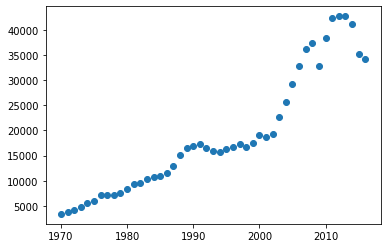

In [7]:
df1=df.drop('per capita income (US$)',axis='columns')
df2=df.drop('year',axis='columns')
plt.scatter(df1,df2)

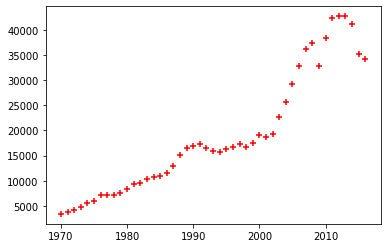

In [8]:
plt.scatter(df1,df2,color='red',marker='+')

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='per capita income (US$)'>

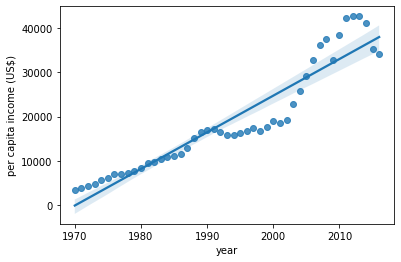

In [9]:
import seaborn as sns
sns.regplot(df1,df2)

In [10]:
reg=linear_model.LinearRegression()
reg.fit(df1,df2)

LinearRegression()

In [11]:
reg.predict([[2020]])

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41288.69409442]])

In [12]:
reg.coef_

array([[828.46507522]])

In [13]:
reg.intercept_

array([-1632210.75785546])

In [14]:
reg.predict([[2022]])

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[42945.62424486]])

In [15]:
###===============   MULTIPLE VARIABLES  ==============



In [16]:
d=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [17]:
d.experience= d.experience.fillna('zero')
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [18]:
pip install word2number 

Note: you may need to restart the kernel to use updated packages.


In [19]:
from word2number import w2n

In [20]:
d.experience=d.experience.apply(w2n.word_to_num)

In [21]:
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [22]:
import math
mean=math.floor(d['test_score(out of 10)'].mean())
mean

7

In [23]:
d['test_score(out of 10)']=d['test_score(out of 10)'].fillna(mean)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [24]:
raj=linear_model.LinearRegression()
raj.fit(d[['experience','test_score(out of 10)','interview_score(out of 10)']],d['salary($)'])

LinearRegression()

In [25]:
raj.predict([[2,9,6]])

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [26]:
#================== DUMMY VARIABLES AND ONEHOTENCODER ==================

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/homeprices.csv')

In [29]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [30]:
dummies = pd.get_dummies(df['town'])

In [31]:
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [32]:
merge = pd.concat([df,dummies],axis='columns')
merge

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [33]:
final= merge.drop(['town','west windsor'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [34]:
X=final.drop('price',axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [35]:
y=final.price

In [36]:
re=LinearRegression()

In [37]:
re.fit(X,y)

LinearRegression()

In [38]:
re.score(X,y)

0.9573929037221871

In [39]:
re.predict([[3400,0,0]])

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [40]:
re.predict([[2800,0,1]])

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [41]:
####================ now by using-----------OneHotEncoder  Method ======================

In [42]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()
df.town = le.fit_transform(df.town)
df

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [45]:
r=df[['town','area']].values
r

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [46]:
y=df.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [48]:
x = ct.fit_transform(r)
x

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [49]:
x=x[:,1:]
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [50]:
y=df.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [51]:
reg=LinearRegression()

In [52]:
reg.fit(x,y)

LinearRegression()

In [53]:
reg.score(x,y)

0.9573929037221873

In [54]:
reg.predict([[0,1,3400]])

array([681241.66845839])

In [55]:
#=============== EXERCISE PROBLEM ==================

In [56]:
sd= pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv')
sd

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [58]:
sd['Car Model']=le.fit_transform(sd['Car Model'])
sd

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [59]:
s=sd.drop('Sell Price($)',axis='columns').values
s

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [60]:
y=sd['Sell Price($)'].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('Car model',OneHotEncoder(),[0])],remainder='passthrough')

In [62]:
X=ct.fit_transform(s)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [63]:
x=X[:,1:]
x

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [64]:
from sklearn.linear_model import LinearRegression

rg=LinearRegression()

In [65]:
rg.fit(x,y)

LinearRegression()

In [66]:
rg.score(x,y)

0.9417050937281083

In [67]:
rg.predict([[0,1,45000,4]])

array([36991.31721063])

In [68]:
rg.predict([[1,0,86000,7]])

array([11080.74313217])

In [69]:
sd

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [70]:
#=============== TRIN_TEST_SPLIT ===========
#   it is used to train the model into train and test is for some part is for train the model and remaining is for test the model.

In [71]:
fd=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/6_train_test_split/carprices.csv')
fd

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [72]:
import matplotlib.pyplot as plt


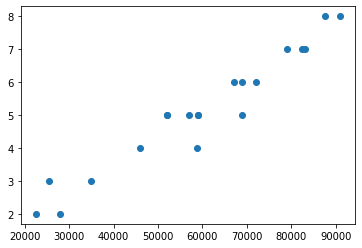

In [73]:
plt.scatter(fd.Mileage,fd['Age(yrs)'])

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage', ylabel='Age(yrs)'>

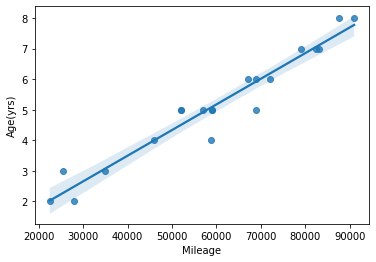

In [74]:
sns.regplot(fd.Mileage,fd['Age(yrs)'])

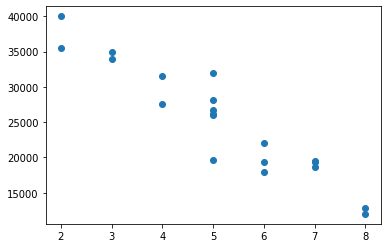

In [75]:
plt.scatter(fd['Age(yrs)'],fd['Sell Price($)'])

<AxesSubplot:xlabel='Age(yrs)', ylabel='Sell Price($)'>

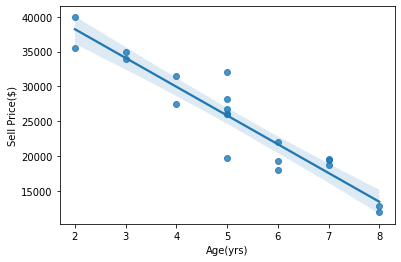

In [76]:
sns.regplot(fd['Age(yrs)'],fd['Sell Price($)'])

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x=fd.drop('Sell Price($)',axis='columns')
y=fd['Sell Price($)']

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [80]:
## random_state=10   is used for unchange the train_test data set values

In [81]:
x_train

,Mileage,Age(yrs)
3,22500,2
18,87600,8
13,58780,4
2,57000,5
14,82450,7
8,91000,8
17,69000,5
16,28000,2
19,52000,5
12,59000,5


In [82]:
x_test

,Mileage,Age(yrs)
7,72000,6
10,83000,7
5,59000,5
6,52000,5


In [83]:
y_train

3     40000
18    12800
13    27500
2     26100
14    19400
8     12000
17    19700
16    35500
19    28200
12    26000
11    19500
1     34000
0     18000
15    35000
4     31500
9     22000
Name: Sell Price($), dtype: int64

In [84]:
y_test

7     19300
10    18700
5     26750
6     32000
Name: Sell Price($), dtype: int64

In [85]:
from sklearn.linear_model import LinearRegression
clt= LinearRegression()

In [86]:
clt.fit(x_train,y_train)

LinearRegression()

In [87]:
clt.score(x_train,y_train)

0.955204022731367

In [88]:
clt.predict([[52000,5]])

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27197.42175439])